In [11]:
import numpy as np
import pandas as pd
from scipy.stats import skew
from scipy.stats import entropy
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
wine = pd.read_csv('winequality-red.csv',sep=";")
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Statistical Properties

In [4]:
wine.mean()

fixed acidity            8.319637
volatile acidity         0.527821
citric acid              0.270976
residual sugar           2.538806
chlorides                0.087467
free sulfur dioxide     15.874922
total sulfur dioxide    46.467792
density                  0.996747
pH                       3.311113
sulphates                0.658149
alcohol                 10.422983
quality                  5.636023
dtype: float64

In [5]:
wine.var()

fixed acidity              3.031416
volatile acidity           0.032062
citric acid                0.037947
residual sugar             1.987897
chlorides                  0.002215
free sulfur dioxide      109.414884
total sulfur dioxide    1082.102373
density                    0.000004
pH                         0.023835
sulphates                  0.028733
alcohol                    1.135647
quality                    0.652168
dtype: float64

In [16]:
wine.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

In [24]:
prob_dist = wine['quality'].value_counts(normalize=True)  
entropy_value = entropy(prob_dist)
print(f" Entopy: {entropy_value}")

 Entopy: 1.1846312554403946


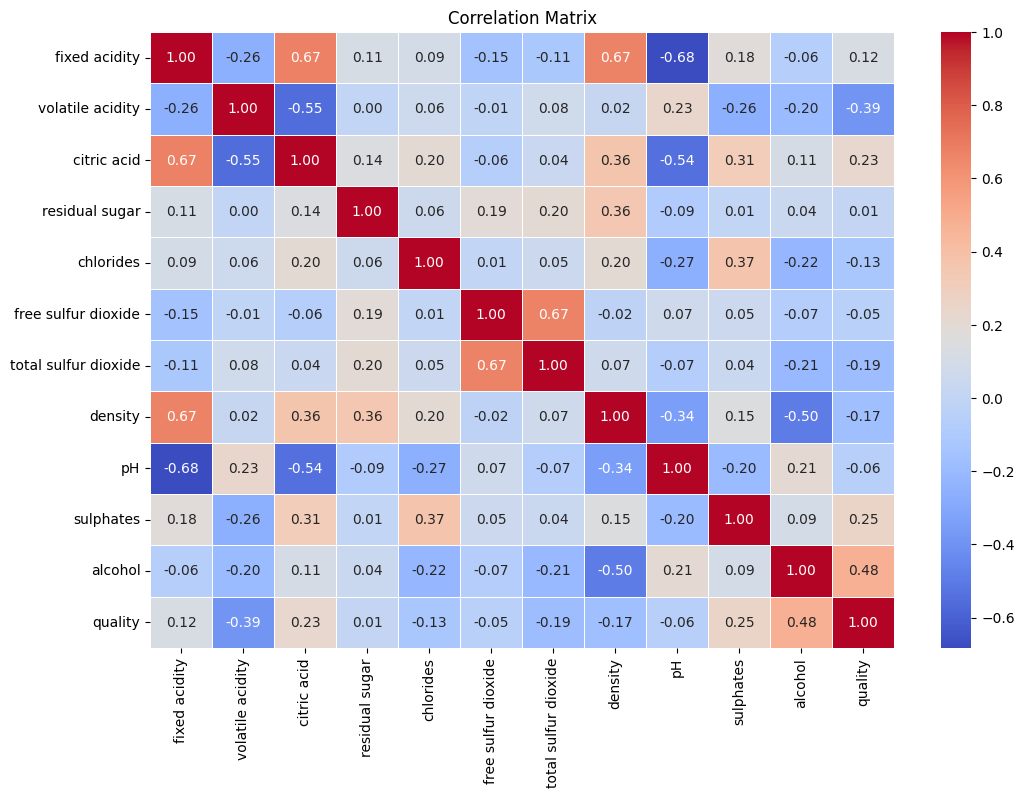

In [12]:
wine_corr = wine.corr()
plt.figure(figsize=(12,8))
sns.heatmap(wine_corr, annot=True, cmap="coolwarm", fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [ ]:
quality_correlation = wine_corr["quality"].drop("quality") 
print(np.round(quality_correlation, 2))

fixed acidity           0.12
volatile acidity       -0.39
citric acid             0.23
residual sugar          0.01
chlorides              -0.13
free sulfur dioxide    -0.05
total sulfur dioxide   -0.19
density                -0.17
pH                     -0.06
sulphates               0.25
alcohol                 0.48
Name: quality, dtype: float64


In [29]:
X = wine.drop(columns=["quality"])
y = wine['quality']

converting quality to categroical values

In [30]:
y = pd.cut(y, bins=[0, 5, 7, 10], labels=[0, 1, 2])

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

In [36]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [37]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [40]:
y_pred = clf.predict(X_test_scaled)

In [45]:
print("Accuracy score = ", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy score =  0.7875

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.79      0.78       149
           1       0.80      0.80      0.80       167
           2       1.00      0.25      0.40         4

    accuracy                           0.79       320
   macro avg       0.86      0.61      0.66       320
weighted avg       0.79      0.79      0.79       320

